In [1]:
library(twitteR)
library(stringr)
library(wordcloud)

Warning message:
"package 'wordcloud' was built under R version 3.3.3"Loading required package: RColorBrewer


In [2]:
api_key <- "alEJkwQJQjs6SHXWbsTmQcUI9"
api_secret <- "Je1LkjkBhpzsB6GASw7xUHsfvSA9rCVz0is80HVMccDbnQsKV1"
access_token <- "139005952-gQJeEIEmw4e9jgnwb6D7KDjh7KuS9sjRkzUsruiN"
access_token_secret <- "vE8dEULqlRH2EM0hZZiFIzWQXoHEIiC9wF0arPdSXgAg7"
setup_twitter_oauth(api_key,api_secret,access_token,access_token_secret)

[1] "Using direct authentication"


In [3]:
cannes_data_set <- searchTwitter('cannes', n=5000, lang = 'en')
cannes_data_set.df <- twListToDF(cannes_data_set)
head(cannes_data_set)

[[1]]
[1] "swen_ryan: @ManiLazic OKJA, the new Bong Joon-ho in competition at Cannes"

[[2]]
[1] "dandy_cannes: RT @Ecaterina_02: A smile for all my friends... https://t.co/KuXt42zU0M"

[[3]]
[1] "aliagaia1: Roy Eldridge, Coleman Hawkins, Vic Dickenson 1958 Cannes - Undecided TV+... https://t.co/9ew8qhcpTW via @YouTube"

[[4]]
[1] "dandy_cannes: RT @geekwidow: Good morning twitter... <ed><U+00A0><U+00BC><ed><U+00BC><U+009E><ed><U+00A0><U+00BD><ed><U+00B2><U+00AB><ed><U+00A0><U+00BD><ed><U+00B2><U+009D> https://t.co/M6AwjmxJbC"

[[5]]
[1] "Lorofous: RT @ghefrentte: THIS DAY IN HISTORY\nFellini's \"8½\" opens at Cannes Film Festival in 1963, becoming one of the most celebrated italian films"

[[6]]
[1] "jesuisjulupus: RT @PlessyLud: Saturday beach Fever baby @olidedieu @villecannes #beach #holidays #cannes <ed><U+00A0><U+00BD><ed><U+00B8><U+008E><ed><U+00A0><U+00BE><ed><U+00B4><U+0098> https://t.co/vBMowAhCst"


In [4]:
head(cannes_data_set.df)

text                                                                                                                                                                                              
1 @ManiLazic OKJA, the new Bong Joon-ho in competition at Cannes                                                                                                                                    
2 RT @Ecaterina_02: A smile for all my friends... https://t.co/KuXt42zU0M                                                                                                                           
3 Roy Eldridge, Coleman Hawkins, Vic Dickenson 1958 Cannes - Undecided TV+... https://t.co/9ew8qhcpTW via @YouTube                                                                                  
4 RT @geekwidow: Good morning twitter... <ed><U+00A0><U+00BC><ed><U+00BC><U+009E><ed><U+00A0><U+00BD><ed><U+00B2><U+00AB><ed><U+00A0><U+00BD><ed><U+00B2><U+009D> https://t.co/M6AwjmxJbC           
5 RT @ghefrentte: THIS DAY IN HISTORY\nFellini's "8½" opens at Cannes Film Festival in 1963, becoming one of the most celebrated italian films                                                     
6 RT @PlessyLud: Saturday beach Fever baby @olidedieu @villecannes #beach #holidays #cannes <ed><U+00A0><U+00BD><ed><U+00B8><U+008E><ed><U+00A0><U+00BE><ed><U+00B4><U+0098> https://t.co/vBMowAhCst
  favorited favoriteCount replyToSN created             truncated
1 FALSE     1             ManiLazic 2017-04-22 21:05:52 FALSE    
2 FALSE     0             NA        2017-04-22 21:04:52 FALSE    
3 FALSE     0             NA        2017-04-22 21:04:12 FALSE    
4 FALSE     0             NA        2017-04-22 21:03:06 FALSE    
5 FALSE     0             NA        2017-04-22 21:02:58 FALSE    
6 FALSE     0             NA        2017-04-22 21:02:56 FALSE    
  replyToSID         id                 replyToUID
1 855890158268407809 855890421817294848 915615620 
2 NA                 855890169454526464 NA        
3 NA                 855890001565020164 NA        
4 NA                 855889723981787136 NA        
5 NA                 855889691215835137 NA        
6 NA                 855889683267686400 NA        
  statusSource                                                                        
1 <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  
2 <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                  
3 <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                  
4 <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                  
5 <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>
6 <a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>   
  screenName    retweetCount isRetweet retweeted longitude latitude
1 swen_ryan       0          FALSE     FALSE     NA        NA      
2 dandy_cannes  872           TRUE     FALSE     NA        NA      
3 aliagaia1       0          FALSE     FALSE     NA        NA      
4 dandy_cannes    2           TRUE     FALSE     NA        NA      
5 Lorofous        2           TRUE     FALSE     NA        NA      
6 jesuisjulupus   2           TRUE     FALSE     NA        NA

In [5]:
TextPreprocessing <- lapply(cannes_data_set.df$text, function(x) {
  x = gsub('http\\S+\\s*', '', x) ## Remove URLs
  x = gsub('\\b+RT', '', x) ## Remove RT
  x = gsub('#\\S+', '', x) ## Remove Hashtags
  x = gsub('@\\S+', '', x) ## Remove Mentions
  x = gsub('[[:cntrl:]]', '', x) ## Remove Controls and special characters
  x = gsub("\\d", '', x) ## Remove Controls and special characters
  x = gsub('[[:punct:]]', '', x) ## Remove Punctuations
  x = gsub("^[[:space:]]*","",x) ## Remove leading whitespaces
  x = gsub("[[:space:]]*$","",x) ## Remove trailing whitespaces
  x = gsub(' +',' ',x) ## Remove extra whitespaces
})

In [6]:
TextPreprocessing

[[1]]
[1] "OKJA the new Bong Joonho in competition at Cannes"

[[2]]
[1] "A smile for all my friends"

[[3]]
[1] "Roy Eldridge Coleman Hawkins Vic Dickenson Cannes Undecided TV via"

[[4]]
[1] "Good morning twitter <U+653C><U+3E64><U+613C><U+3E30><U+623C><U+3E63><U+653C><U+3E64><U+623C><U+3E63><U+393C><U+3E65><U+653C><U+3E64><U+613C><U+3E30><U+623C><U+3E64><U+653C><U+3E64><U+623C><U+3E32><U+613C><U+3E62><U+653C><U+3E64><U+613C><U+3E30><U+623C><U+3E64><U+653C><U+3E64><U+623C><U+3E32><U+393C><U+3E64>"

[[5]]
[1] "THIS DAY IN HISTORYFellinis opens at Cannes Film Festival in becoming one of the most celebrated italian films"

[[6]]
[1] "Saturday beach Fever baby <U+653C><U+3E64><U+613C><U+3E30><U+623C><U+3E64><U+653C><U+3E64><U+623C><U+3E38><U+383C><U+3E65><U+653C><U+3E64><U+613C><U+3E30><U+623C><U+3E65><U+653C><U+3E64><U+623C><U+3E34><U+393C><U+3E38>"

[[7]]
[1] "What Movies Are Critics Most Excited to See at Cannes  Critics Survey via"

[[8]]
[1] "And this little piggy goes to Cannes"

[[9]]
[1] "Tin Cannes"

[[10]]
[1] "Can the Cannes"

[[11]]
[1] "TEHRAN TABOO a debut animation film by Ali Soozandeh selected by Cannes Critics Week Rotoscoping rocks"

[[12]]
[1] "Bizzle in suit whats up Cannes <U+653C><U+3E64><U+613C><U+3E30><U+623C><U+3E64><U+653C><U+3E64><U+623C><U+3E39><U+383C><U+3E66><U+653C><U+3E64><U+613C><U+3E30><U+623C><U+3E63><U+653C><U+3E64><U+623C><U+3E66><U+623C><U+3E66>"

[[13]]
[1] "Bizzle in suit whats up Cannes <U+653C><U+3E64><U+613C><U+3E30><U+623C><U+3E64><U+653C><U+3E64><U+623C><U+3E39><U+383C><U+3E66><U+653C><U+3E64><U+613C><U+3E30><U+623C><U+3E63><U+653C><U+3E64><U+623C><U+3E66><U+623C><U+3E66>"

[[14]]
[1] "The cast of Hope Springs Eternal will be at Festival de Cannes in France We dont know if Cimorelli will be present "

[[15]]
[1] "Bizzle in suit whats up Cannes <U+653C><U+3E64><U+613C><U+3E30><U+623C><U+3E64><U+653C><U+3E64><U+623C><U+3E39><U+383C><U+3E66><U+653C><U+3E64><U+613C><U+3E30><U+623C><U+3E63><U+653C><U+3E64><U+623C><U+3E66><U+623C><U+3E66>"

[[16]]
[1] "Quentin Tarantino and the cast of Pulp Fiction at the Cannes Film Festival"

[[17]]
[1] "our movie Brigsby Bear is going to Cannes cant wait for everyone to see it"

[[18]]
[1] "A quand cannes"

[[19]]
[1] "our movie Brigsby Bear is going to Cannes cant wait for everyone to see it"

[[20]]
[1] "We are excited to announce that Interrogation is going to the Cannes film festival this year It is a real honor"

[[21]]
[1] "Sweet dreams dear friends"

[[22]]
[1] "Uma Thurman to Preside Over Cannes Un Certain Regard Jury"

[[23]]
[1] "THIS DAY IN HISTORYFellinis opens at Cannes Film Festival in becoming one of the most celebrated italian films"

[[24]]
[1] "our movie Brigsby Bear is going to Cannes cant wait for everyone to see it"

[[25]]
[1] "THIS DAY IN HISTORYFellinis opens at Cannes Film Festival in becoming one of the most celebrated itali"

[[26]]
[1] "A young Brigitte Bardot amp Kirk DouglasCannes"

[[27]]
[1] "This week amp looked marvellous in Chopard at the Diner du Cinema to celebrate the Cannes Film"

[[28]]
[1] "Sweet dreams dear friends"

[[29]]
[1] "film critics pick the movies theyre most excited to see"

[[30]]
[1] "film critics pick the movies theyre most excited to see"

[[31]]
[1] "film critics pick the movies theyre most excited to see"

[[32]]
[1] "our movie Brigsby Bear is going to Cannes cant wait for everyone to see it"

[[33]]
[1] "Recommander Nexity Cannes"

[[34]]
[1] "film critics pick the movies theyre most excited to see"

[[35]]
[1] "film critics pick the movies theyre most excited to see"

[[36]]
[1] "film critics pick the movies theyre most excited to see"

[[37]]
[1] "film critics pick the movies theyre most excited to see"

[[38]]
[1] "film critics pick the movies theyre most excited to see"

[[39]]
[1] "film critics pick the movies theyre most excited to see"

[[40]]
[1] "film critics pick the movies theyre most excited to see"

[[41]]
[1] "Asia The Mirror of my Soul Photosets Asia Argento At Cannes Film

In [7]:
TextPreprocessing2 <- unlist(TextPreprocessing)
TextPreprocessing3 <- grep("TextPreprocessing2", iconv(TextPreprocessing2, "latin1", "ASCII", sub="TextPreprocessing2"))
TextPreprocessing4 <- TextPreprocessing2[-TextPreprocessing3]

In [51]:
head(TextPreprocessing4)

[1] "OKJA the new Bong Joonho in competition at Cannes"                 
[2] "A smile for all my friends"                                        
[3] "Roy Eldridge Coleman Hawkins Vic Dickenson Cannes Undecided TV via"
[4] "And this little piggy goes to Cannes"                              
[5] "Tin Cannes"                                                        
[6] "Can the Cannes"

In [52]:
write(unlist(TextPreprocessing4), file = "Cannes_TweetText")

In [10]:
cannes_hashtags <- str_extract_all(cannes_data_set.df$text, "#\\w+")
cannes_hashtags <- unlist(cannes_hashtags)
cannes_hashtags <- sub("#", "", cannes_hashtags)

In [11]:
cannes_hashtags

[1] "beach"                                  
   [2] "holidays"                               
   [3] "cannes"                                 
   [4] "HolidayASingerOrSong"                   
   [5] "HolidayASingerOrSong"                   
   [6] "tehrantaboo"                            
   [7] "NARKOMANERS"                            
   [8] "NARKOMANKIBIZZLE"                       
   [9] "NARKOMANERS"                            
  [10] "NARKOMANKIBIZZLE"                       
  [11] "NARKOMANERS"                            
  [12] "NARKOMANKIBIZZLE"                       
  [13] "Cannes2017"                             
  [14] "Oldcinema"                              
  [15] "MarionCotillard"                        
  [16] "LeaSeydoux"                             
  [17] "Cannes2017"                             
  [18] "Cannes2017"                             
  [19] "Cannes2017"                             
  [20] "KubaKub"                                
  [21] "Kommunity"                              
  [22] "Cannes2017"                             
  [23] "Cannes2017"                             
  [24] "Cannes2017"                             
  [25] "Cannes2017"                             
  [26] "Cannes2017"                             
  [27] "Cannes2017"                             
  [28] "Cannes2017"                             
  [29] "Zambia"                                 
  [30] "SheIsKing"                              
  [31] "GershKgamedi"                           
  [32] "palmtrees"                              
  [33] "Cannes"                                 
  [34] "battleciel"                             
  [35] "Cotedazurfrance"                        
  [36] "photography"                            
  [37] "song"                                   
  [38] "duorock"                                
  [39] "pop"                                    
  [40] "psychedelic"                            
  [41] "Cannes"                                 
  [42] "MIDEM"                                  
  [43] "bafta"                                  
  [44] "cannes"                                 
  [45] "film"                                   
  [46] "screeni"                                
  [47] "luxurycars"                             
  [48] "luxury"                                 
  [49] "supercars"                              
  [50] "cars"                                   
  [51] "1"                                      
  [52] "HolidayASingerOrSong"                   
  [53] "cannes"                                 
  [54] "cannes2017"                             
  [55] "MallikaSherawat"                        
  [56] "cannes"                                 
  [57] "cannes2017"                             
  [58] "Cannes"                                 
  [59] "Cannes"                                 
  [60] "CotedAzurFrance"                        
  [61] "CotedAzurNow"                           
  [62] "yachtlife"                              
  [63] "luxury"                                 
  [64] "Cannes"                                 
  [65] "Indiefilm"                              
  [66] "Filmmaking"                             
  [67] "Cannes"                                 
  [68] "cinema"                                 
  [69] "CotedAzurFrance"                        
  [70] "CotedA"                                 
  [71] "Cannes"                                 
  [72] "cannes"                                 
  [73] "Cannes"                                 
  [74] "cinema"                                 
  [75] "CotedAzurFrance"                        
  [76] "CotedA"                                 
  [77] "Cannes2017"                             
  [78] "Lerins"                                 
  [79] "island"                                 
  [80] "Cannes"                                 
  [81] "Cannes"                                 
  [82] "CotedAzurFrance"          

In [12]:
write(unlist(cannes_hashtags), file = "Hashtags_Cannes")

In [23]:
data <- read.table("Hashtags_Count", sep="\t")

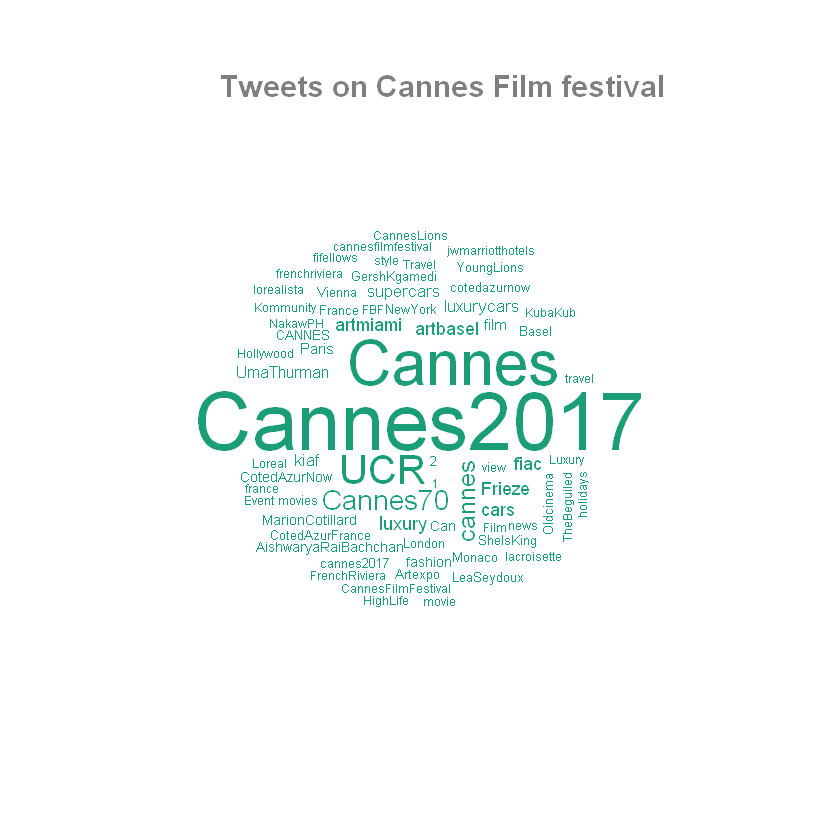

In [48]:
wordcloud(data$V1, data$V2, min.freq = 10, random.order=FALSE,colors="#1B9E77")
title("\n\nTweets on Cannes Film festival",cex.main=1.5, col.main="gray50")

In [49]:
TextPreprocessing4

[1] "OKJA the new Bong Joonho in competition at Cannes"                                                                                      
   [2] "A smile for all my friends"                                                                                                             
   [3] "Roy Eldridge Coleman Hawkins Vic Dickenson Cannes Undecided TV via"                                                                     
   [4] "And this little piggy goes to Cannes"                                                                                                   
   [5] "Tin Cannes"                                                                                                                             
   [6] "Can the Cannes"                                                                                                                         
   [7] "TEHRAN TABOO a debut animation film by Ali Soozandeh selected by Cannes Critics Week Rotoscoping rocks"                                 
   [8] "Quentin Tarantino and the cast of Pulp Fiction at the Cannes Film Festival"                                                             
   [9] "our movie Brigsby Bear is going to Cannes cant wait for everyone to see it"                                                             
  [10] "A quand cannes"                                                                                                                         
  [11] "our movie Brigsby Bear is going to Cannes cant wait for everyone to see it"                                                             
  [12] "We are excited to announce that Interrogation is going to the Cannes film festival this year It is a real honor"                        
  [13] "Sweet dreams dear friends"                                                                                                              
  [14] "our movie Brigsby Bear is going to Cannes cant wait for everyone to see it"                                                             
  [15] "A young Brigitte Bardot amp Kirk DouglasCannes"                                                                                         
  [16] "Sweet dreams dear friends"                                                                                                              
  [17] "film critics pick the movies theyre most excited to see"                                                                                
  [18] "film critics pick the movies theyre most excited to see"                                                                                
  [19] "film critics pick the movies theyre most excited to see"                                                                                
  [20] "our movie Brigsby Bear is going to Cannes cant wait for everyone to see it"                                                             
  [21] "Recommander Nexity Cannes"                                                                                                              
  [22] "film critics pick the movies theyre most excited to see"                                                                                
  [23] "film critics pick the movies theyre most excited to see"                                                                                
  [24] "film critics pick the movies theyre most excited to see"                                                                                
  [25] "film critics pick the movies theyre most excited to see"                                                                                
  [26] "film critics pick the movies theyre most excited to see"                                                                                
  [27] "film critics pick the movies theyre most excited to see"                                                                                
  [28] "film critics pick the movies theyre most excited to see"                        

In [50]:
write(unlist(TextPreprocessing4), file = "Cannes_TweetText1")